



Epoch 1/10


1563/1563 [==============================] - 15s 9ms/step - loss: 1.5091 - accuracy: 0.4494 - val_loss: 1.2065 - val_accuracy: 0.5689
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1394 - accuracy: 0.5982 - val_loss: 1.1261 - val_accuracy: 0.6030
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9936 - accuracy: 0.6497 - val_loss: 0.9845 - val_accuracy: 0.6598
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8991 - accuracy: 0.6857 - val_loss: 0.9685 - val_accuracy: 0.6581
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8211 - accuracy: 0.7120 - val_loss: 0.9287 - val_accuracy: 0.6787
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7683 - accuracy: 0.7295 - val_loss: 0.8892 - val_accuracy: 0.6958
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7167 - accuracy: 0.7483 - val_loss: 0.85

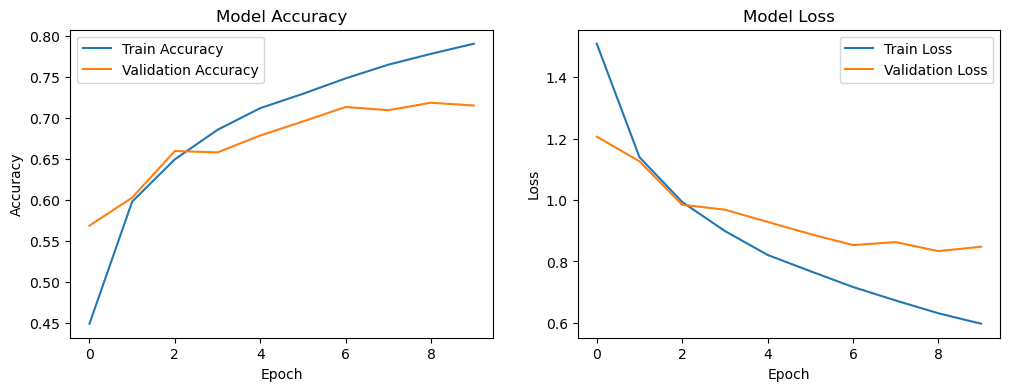

In [1]:
# a. Loading and preprocessing the image data
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# b. Defining the model’s architecture
model = models.Sequential([
    # First convolutional layer: Conv2D followed by MaxPooling
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Third convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Flatten the data for fully connected layers
    layers.Flatten(),
    
    # Fully connected (dense) layers
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes for CIFAR-10
])

# c. Training the model
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# d. Estimating the model’s performance
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


313/313 [==============================] - 2s 4ms/step


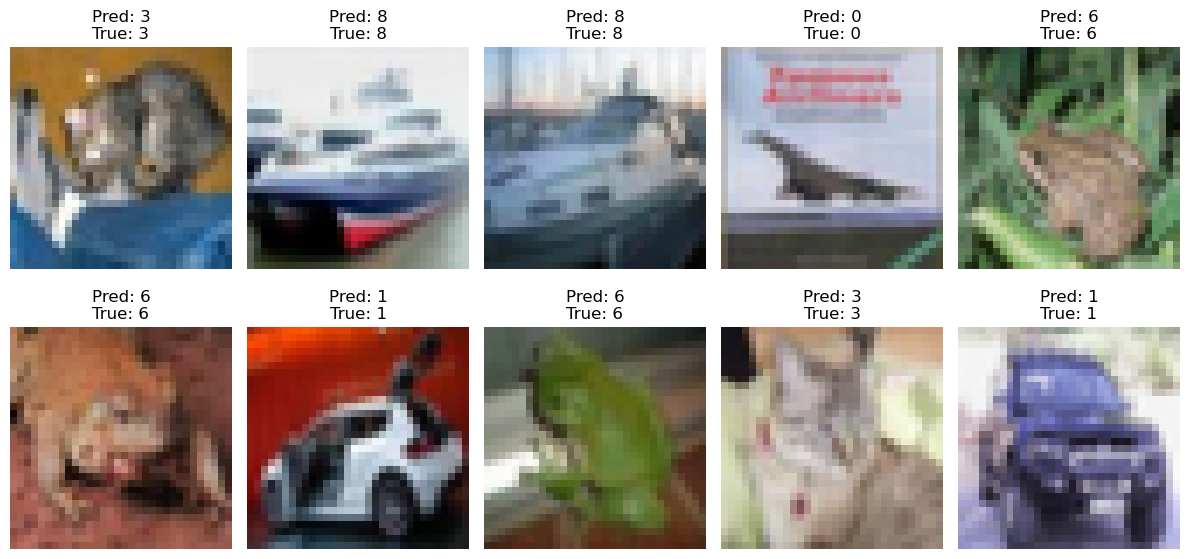

In [2]:
# e. Making predictions on the test images
predictions = model.predict(test_images)

# f. Display a few test images with their predicted and true labels
num_images_to_display = 10
plt.figure(figsize=(12, 6))
for i in range(num_images_to_display):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])  # Display the image
    plt.title(f"Pred: {predictions[i].argmax()}\nTrue: {test_labels[i][0]}")
    plt.axis('off')  # Hide axes
plt.tight_layout()
plt.show()
